## EDA And Feature Engineering Of Google Play Store Dataset

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2) Data Collection.

The data consists of 20 column and 10841 rows.

### Steps We Are Going to Follow
1. Data Clearning
2. Exploratory Data Analysis
3. Feature Engineering

### DATA CLEANING

In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pyplot
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")
df.to_csv("googleplaystore.csv")


In [3]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [4]:
## Check whether there are any null values or not
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### Insights and observations: This dataset has missing values.

In [13]:
df['Reviews'].astype(int)

ValueError: invalid literal for int() with base 10: '3.0M'

In [5]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6002,), dtype=object)

In [6]:
df['Reviews'].str.isnumeric().sum()

np.int64(10840)

In [7]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
df_copy=df.copy()

In [15]:
df_copy=df_copy.drop(df_copy.index[10472])

In [16]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [17]:
## Convert Reviews Datatype to Int
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [19]:
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [36]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [20]:
df_copy['Size']=df_copy['Size'].str.replace("M","000")
df_copy['Size']=df_copy['Size'].str.replace("k","")
df_copy['Size']=df_copy['Size'].replace("Varies with device",np.nan)
df_copy['Size']=df_copy['Size'].astype(float)

In [21]:

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [22]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [57]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [23]:
## Cleaning Price and Installs columns

chars_to_remove = [',','+','$']
columns_to_replace=['Installs','Price']
for char in chars_to_remove:
    for column in columns_to_replace:
        df_copy[column]=df_copy[column].str.replace(char,'')

In [24]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [25]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [26]:
df_copy['Price']=df_copy['Price'].astype(float)
df_copy['Installs']=df_copy['Installs'].astype(int)

In [63]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [27]:
## Handling lastupdated feature
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['Month']=df_copy['Last Updated'].dt.month
df_copy['Year']=df_copy['Last Updated'].dt.year




In [32]:
df_copy.to_csv("./data/google_cleaned.csv")

### Exploratory Data Analysis

In [29]:
df_copy[df_copy.duplicated('App')].shape

(1181, 16)

In [30]:
# Observations
# The dataset has duplicate records.
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')

In [31]:
df_copy.shape

(9659, 16)

In [33]:
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

print('We have {} numerical features : {}',len(numeric_features),numeric_features)
print('We have {} categorical features : {}',len(categorical_features),categorical_features)

We have {} numerical features : {} 9 ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']
We have {} categorical features : {} 7 ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


## 3.2 Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [34]:
## Proportion of count data on categorical columns
for feature in categorical_features:
    print(df_copy[feature].value_counts(normalize=True)*100)
    print('----------------------------')

App
iHoroscope - 2018 Daily Horoscope & Astrology         0.010353
Photo Editor & Candy Camera & Grid & ScrapBook        0.010353
Coloring book moana                                   0.010353
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010353
Sketch - Draw & Paint                                 0.010353
                                                        ...   
Learn To Draw Kawaii Characters                       0.010353
3D Color Pixel by Number - Sandbox Art Coloring       0.010353
Mandala Coloring Book                                 0.010353
Tattoo Name On My Photo Editor                        0.010353
Name Art Photo Editor - Focus n Filters               0.010353
Name: proportion, Length: 9659, dtype: float64
----------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY        

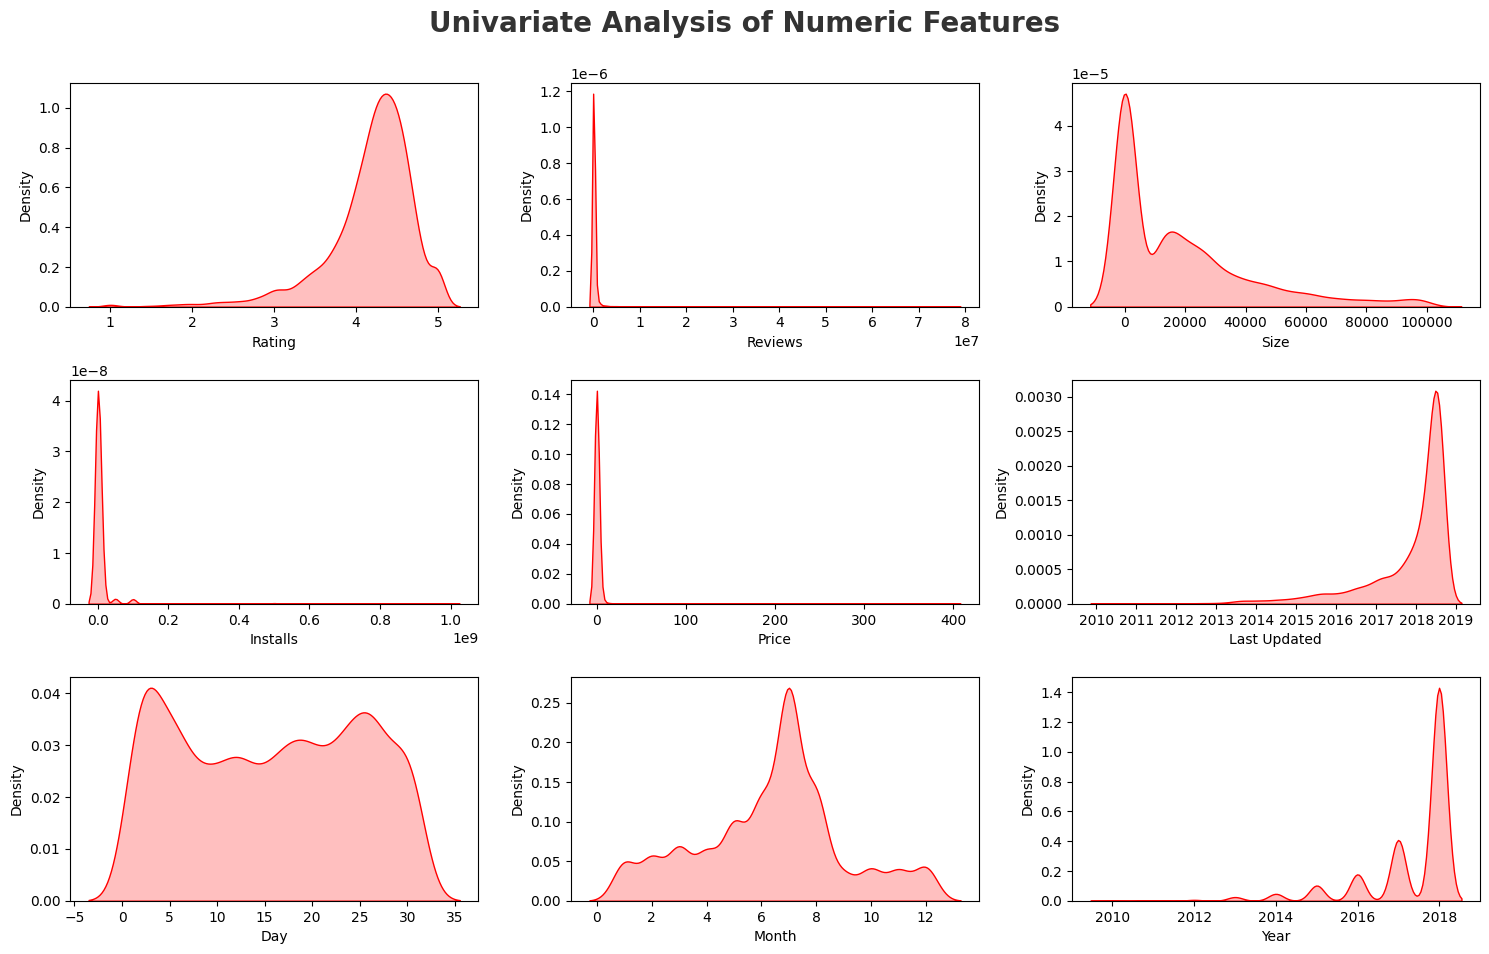

In [36]:
## Proportion of count data on categorical columns
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numeric Features", fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for feature in range(0,len(numeric_features)):
    plt.subplot(5,3,feature+1)
    sns.kdeplot(x=df_copy[numeric_features[feature]],shade=True,color='r')
    plt.xlabel(numeric_features[feature])
    plt.tight_layout()

In [ ]:
## Observations
## Rating and Year is left skewed while Reviews, Installs, Size and Price are right skewed.

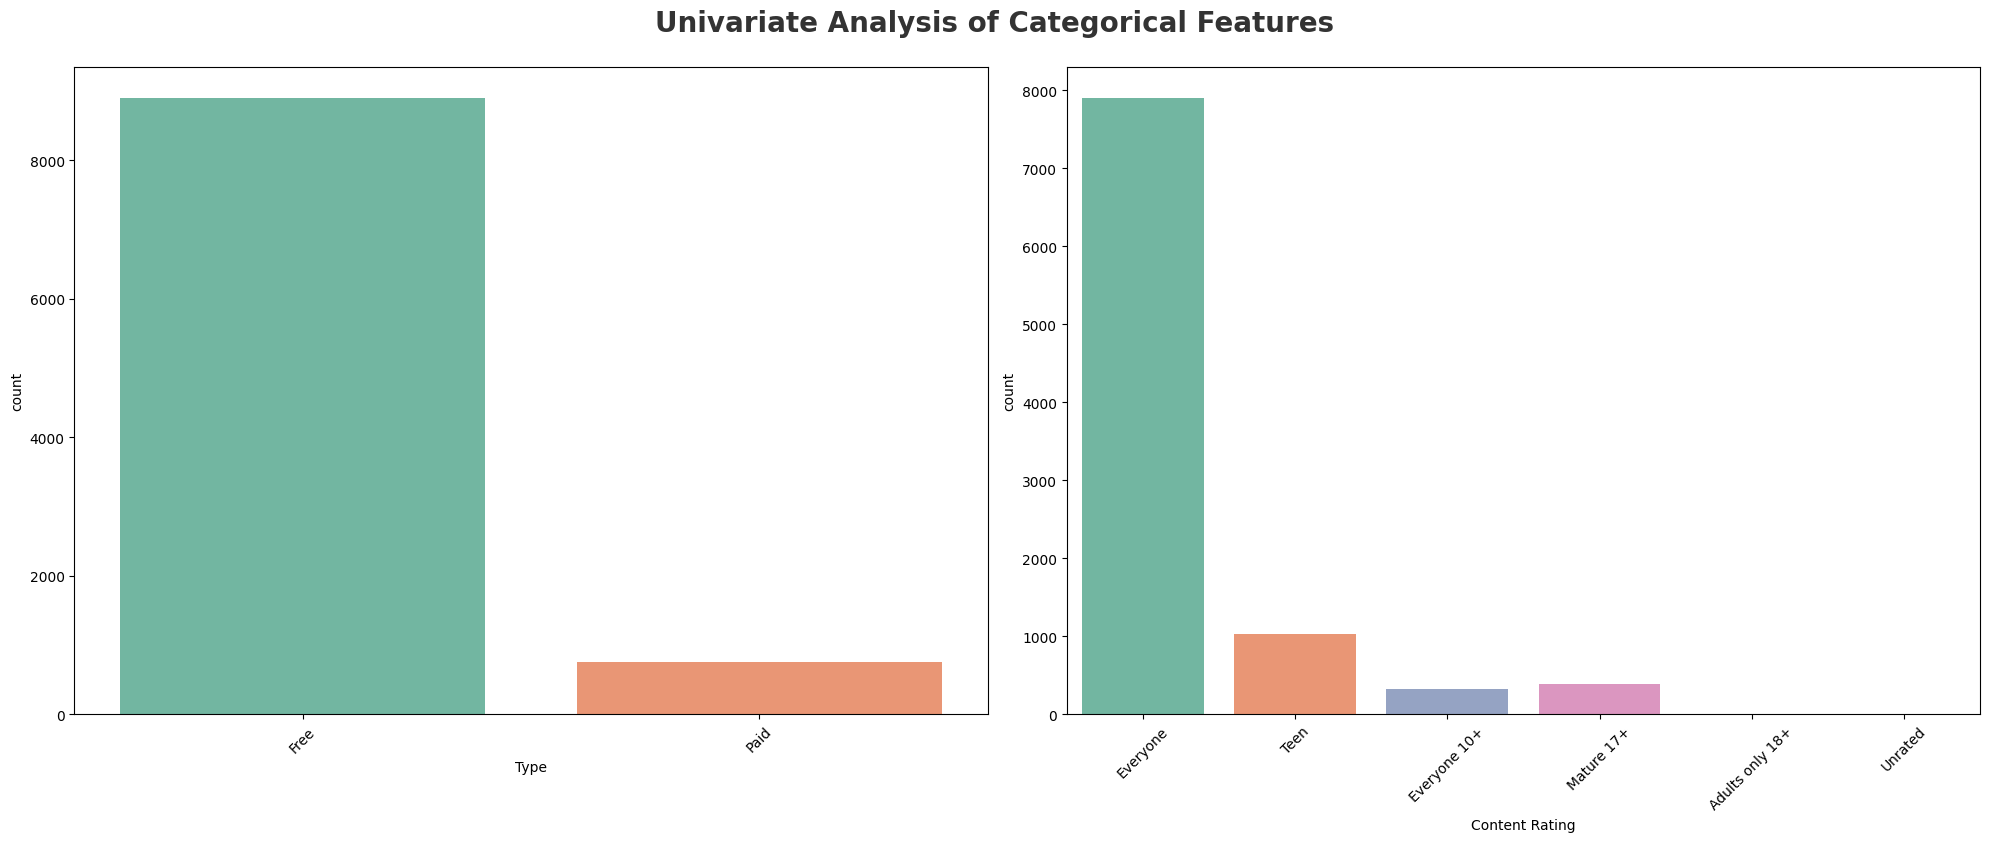

In [38]:
## Categorical columns
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8,y=1.)
categories=['Type', 'Content Rating']
for category in range(0,len(categories)):
    plt.subplot(2,2,category+1)
    sns.countplot(x=df_copy[categories[category]],palette='Set2')
    plt.xlabel(categories[category])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Which is the most popular app category?

<Axes: ylabel='count'>

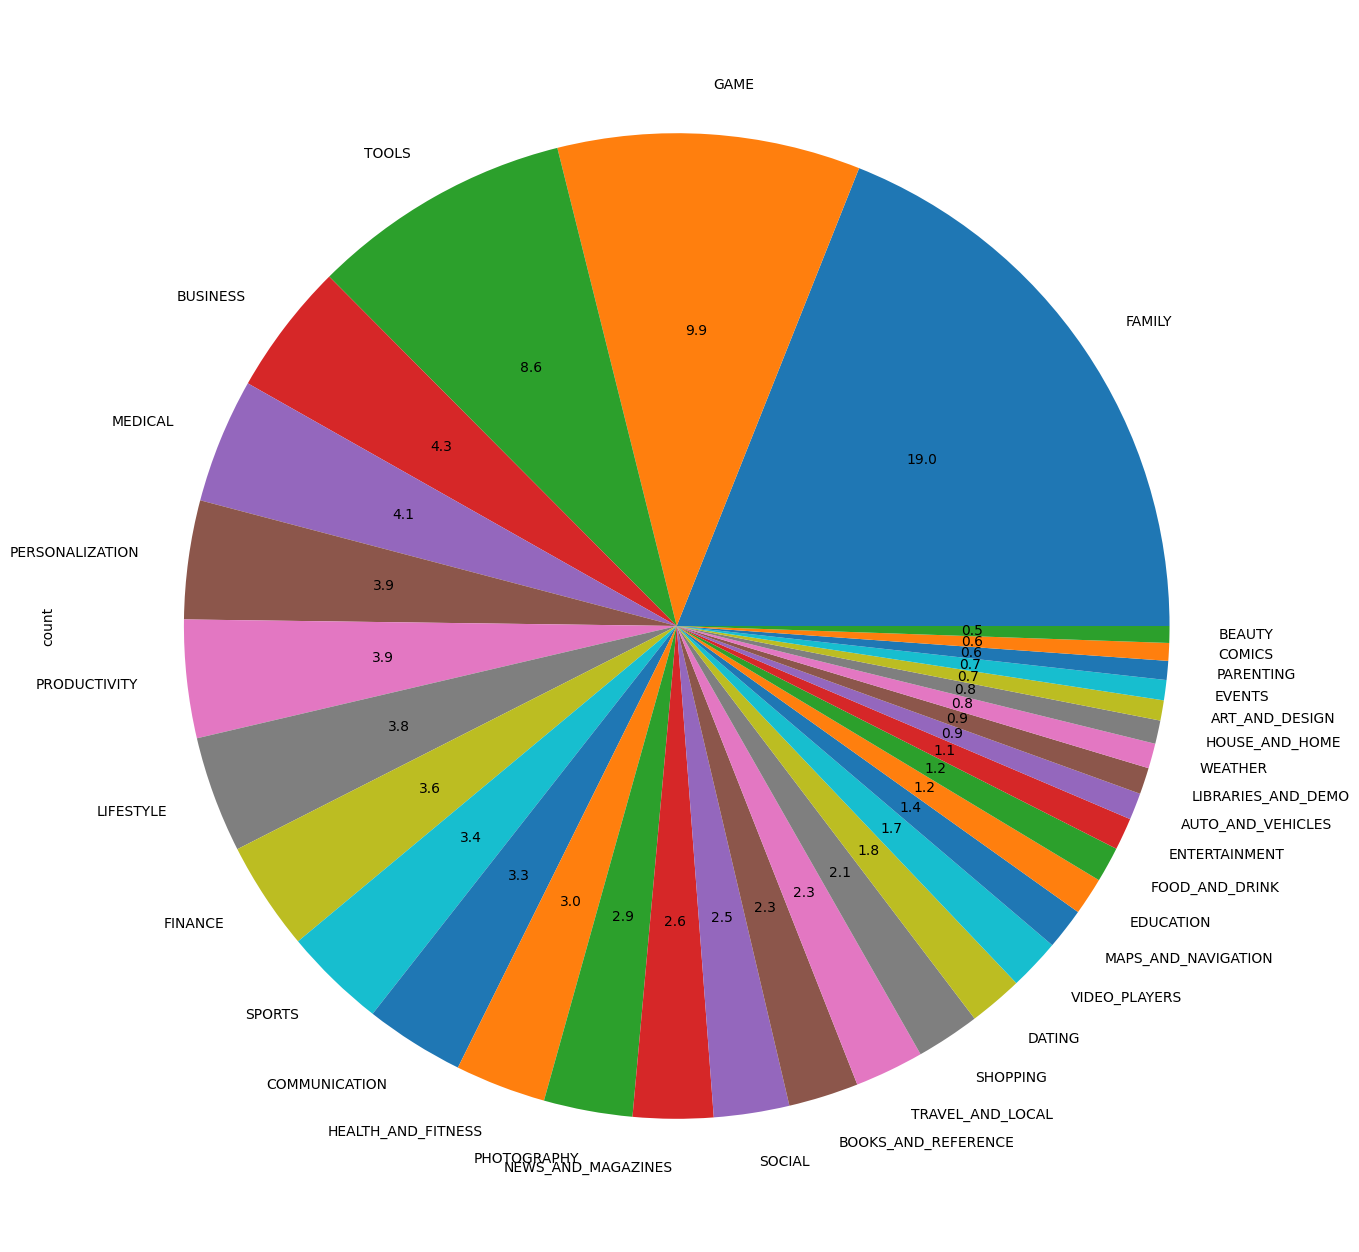

In [40]:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(20,16),autopct='%1.1f')

#### Observations
* There are more kinds of apps in playstore which are under category of Family, Games and Tools.
* Beauty, comics, arts and weather kinds of apps are very less in playstore.

In [73]:
## Top 10 App Categories
## Create DataFrame of Apps on the basis of Category
category = pd.DataFrame(df['Category'].value_counts())
category.rename(columns={'Category':'Count'},inplace=True)


In [63]:
category

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


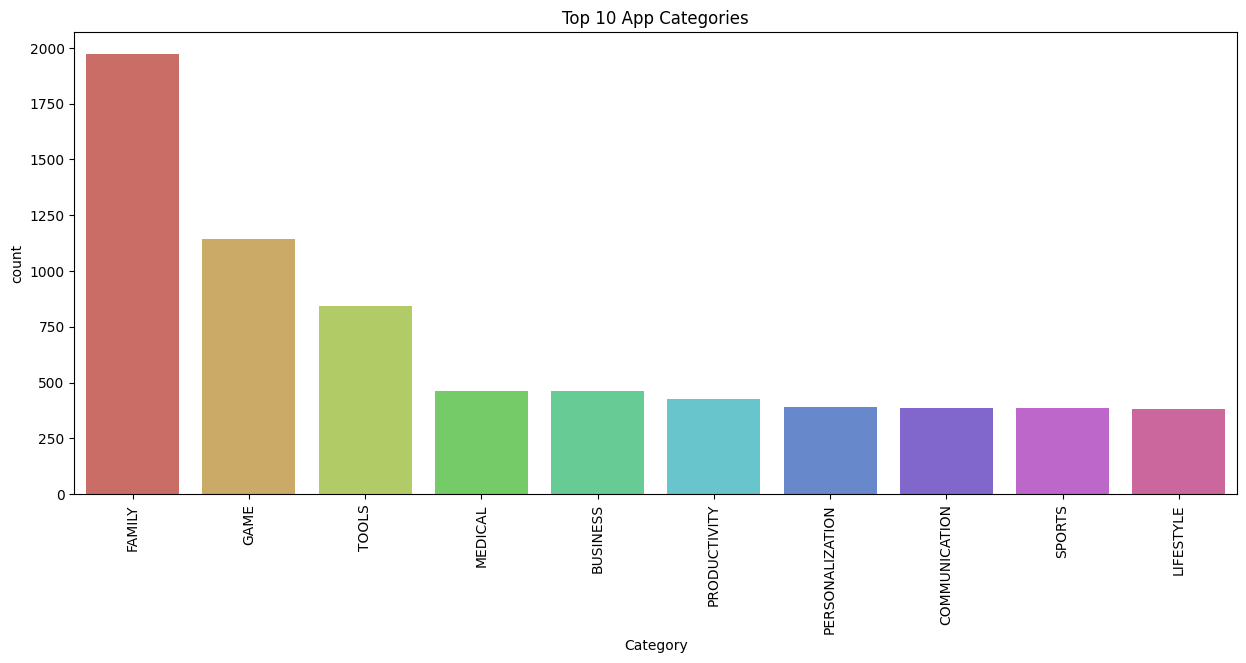

In [65]:
## Top 10 apps
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y='count', data=category[:10],palette='hls')
plt.title('Top 10 App Categories')
plt.xticks(rotation=90)
plt.show()

#### Insights
* Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
* Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

#### Internal Assignments : Which category has largest number of installations?

Text(0.5, 1.0, 'Most Popular Category in Play Store')

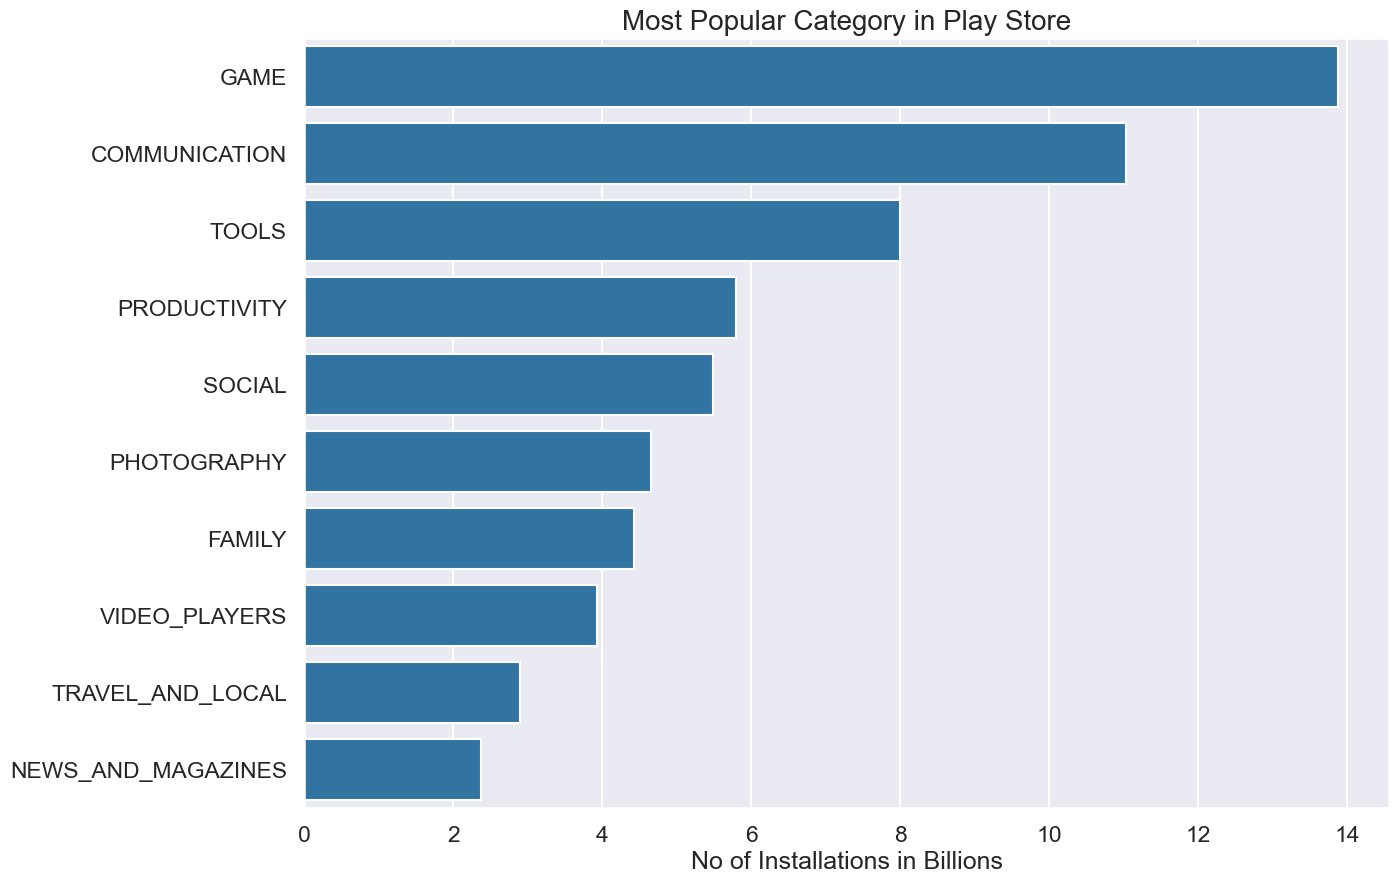

In [84]:

df_cat_installs=df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs=df_cat_installs.Installs/1000000000 # Converting into billions
df2=df_cat_installs.head(10)

plt.figure(figsize=(14,10))
sns.set_context('talk')
sns.set_style('darkgrid')

ax=sns.barplot(x='Installs', y='Category',data=df2)
ax.set_xlabel("No of Installations in Billions")
ax.set_ylabel('')
ax.set_title('Most Popular Category in Play Store',size=20)

## Insights
1. Out of all the categories "GAME" has the most number of Installations.
2. With almost 35 Billion Installations GAME is the most popular Category in Google App store

#### Internal Assignments : What are the top 5 most installed Apps in Each popular Categories?

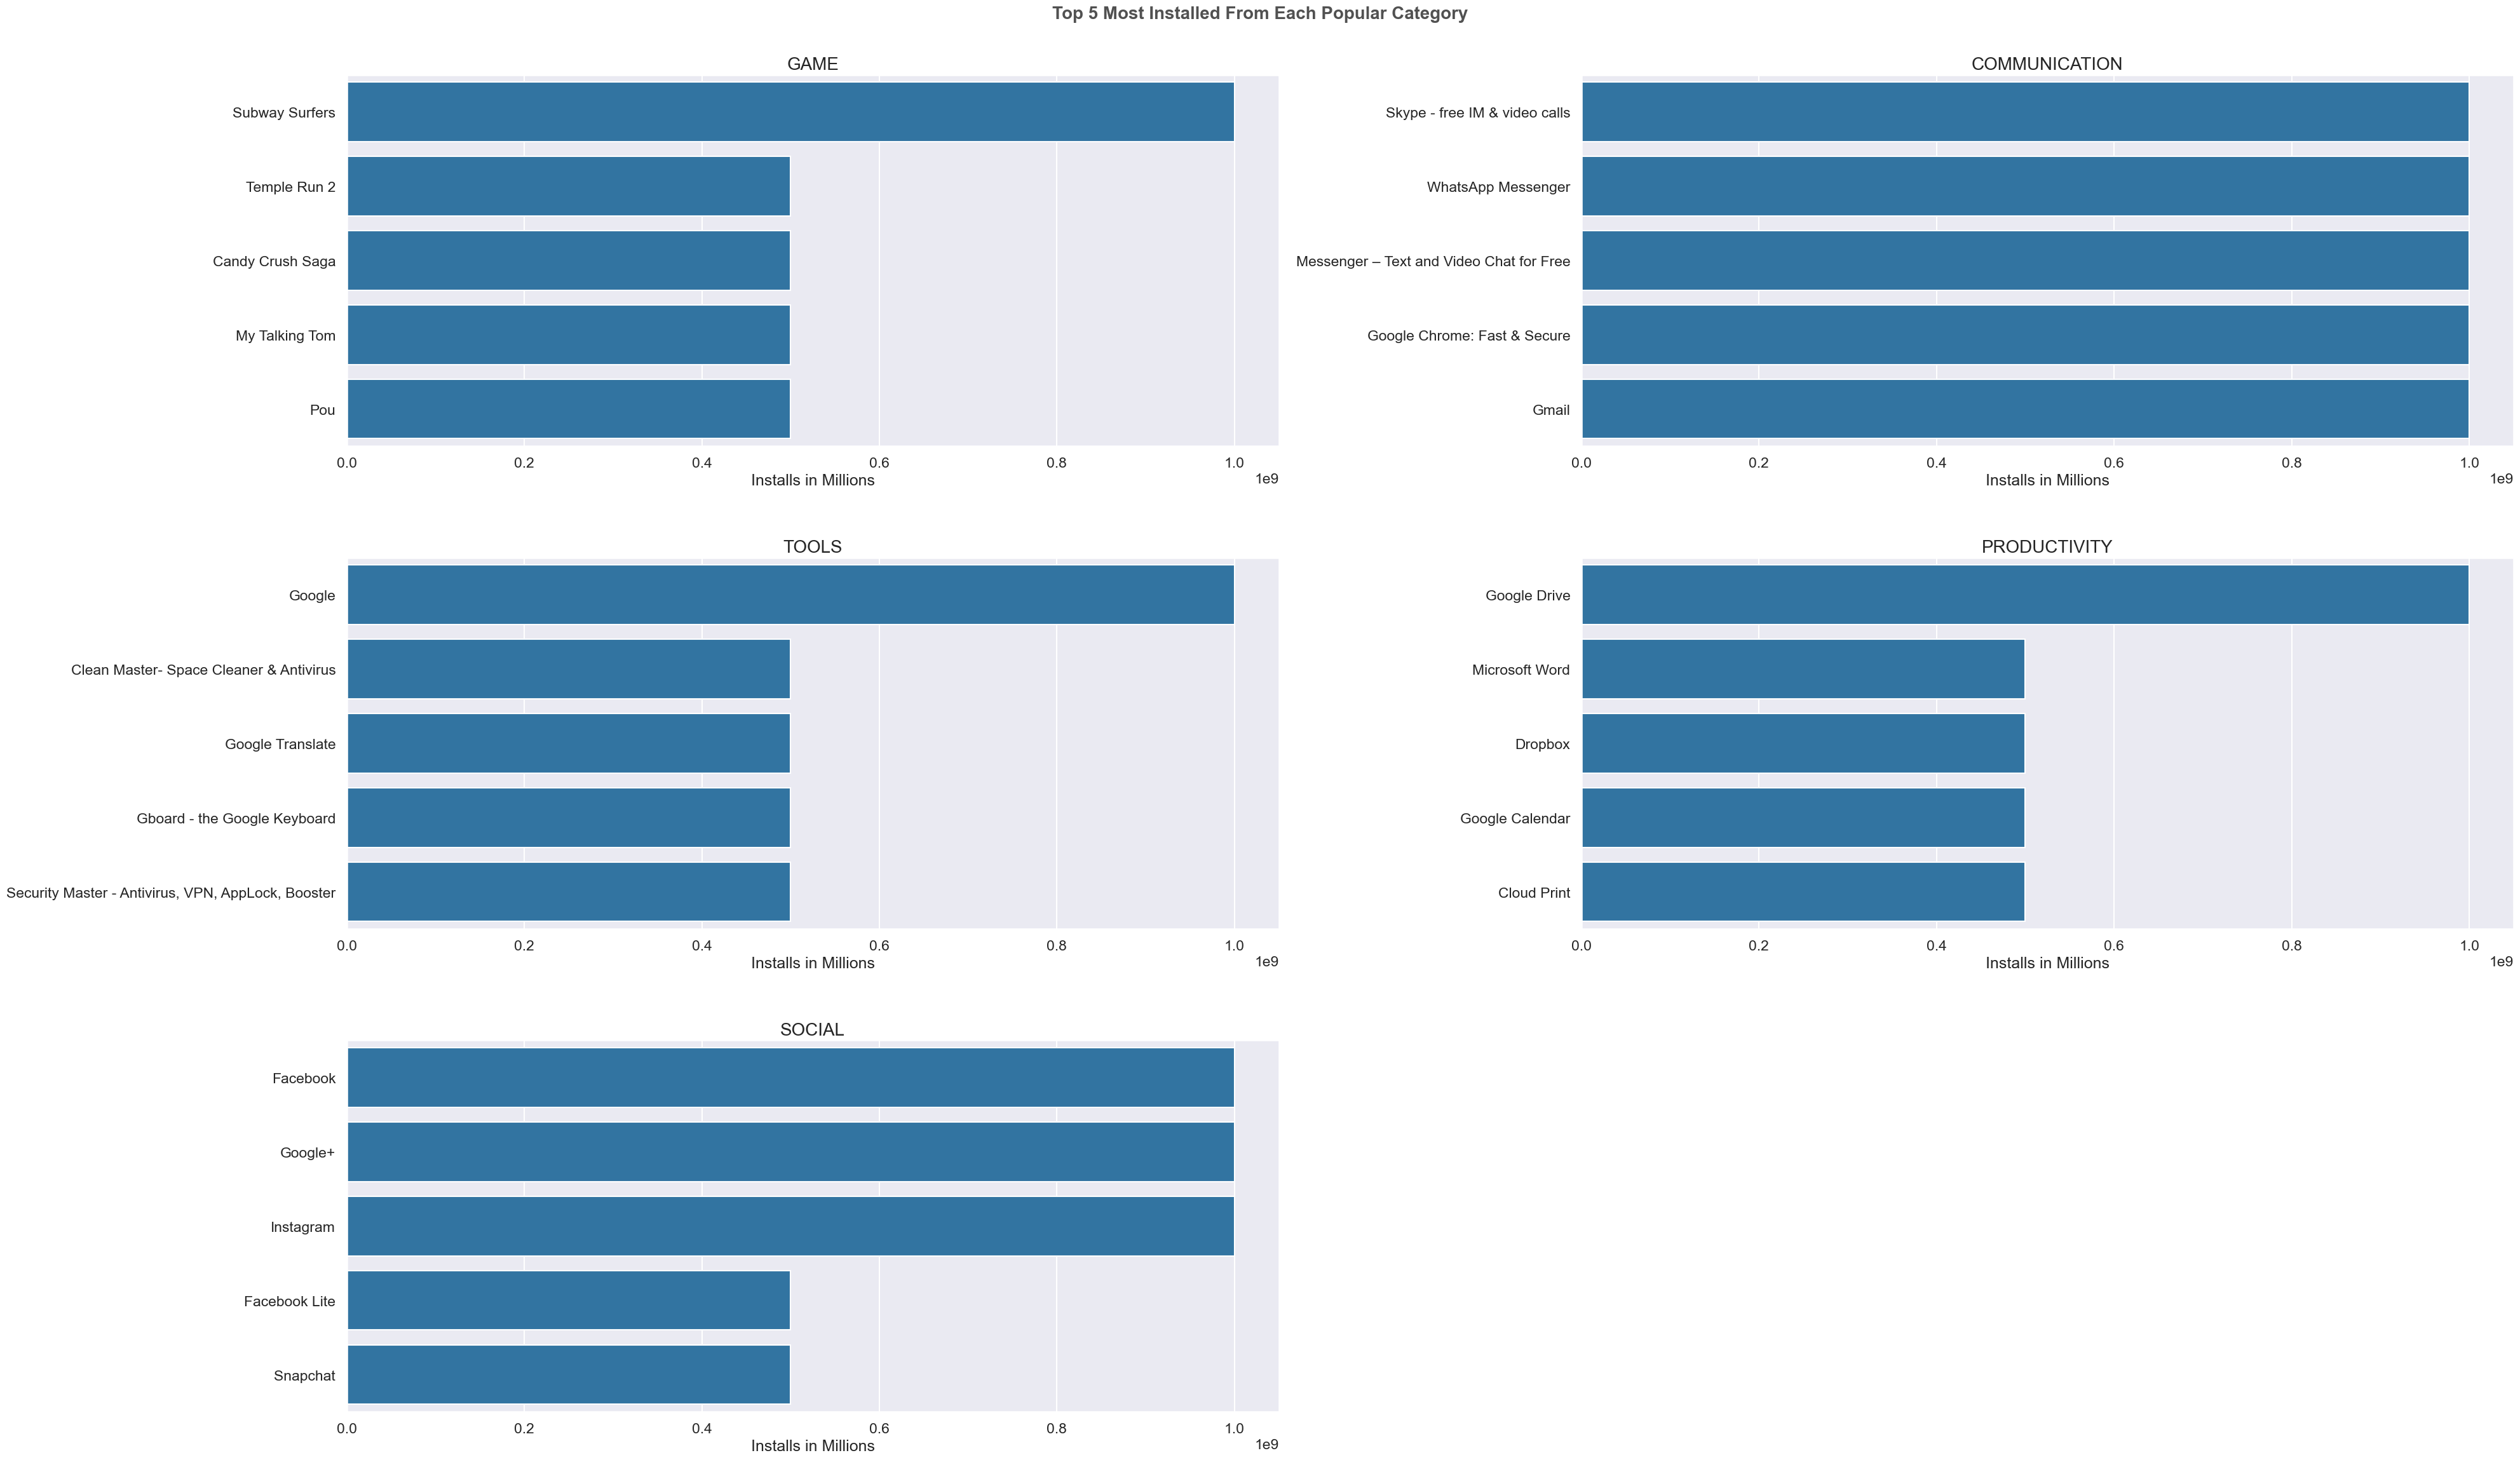

In [ ]:

df_app_cat_installs=df_copy.groupby(['Category','App'])['Installs'].sum().reset_index()
df_app_cat_installs.sort_values('Installs',ascending=False,inplace=True)
poplr_cats=['GAME','COMMUNICATION','TOOLS','PRODUCTIVITY','SOCIAL']


plt.figure(figsize=(40,30))
plt.suptitle("Top 5 Most Installed From Each Popular Category", fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for idx,cat in enumerate(poplr_cats):
    df2=df_app_cat_installs[df_app_cat_installs.Category==cat]
    df3=df2.head(5)
    
    plt.subplot(4,2,idx+1)
    sns.set_context('talk')
    sns.set_style('darkgrid')  

    sns.barplot(x='Installs', y='App',data=df3)
    plt.xlabel("Installs in Millions")
    plt.ylabel("")
    plt.title(cat,size=20)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()



## Insights
- Most popular game is Subway Surfers.
- Most popular communication app is Hangouts.
- Most popular productivity app is Google Drive.
- Most popular social app is Instagram.

#### Internal Assignments : How many apps are there on Google Play Store which get 5 star rating? 

In [126]:
df_copy=pd.read_csv("./data/google_cleaned.csv")
rating=df_copy.groupby(['Category','Installs','App'])['Rating'].sum().sort_values(ascending=False).reset_index()
top_rating_apps=rating[rating['Rating']==5.0]
print("Number of 5 rated apps are :",top_rating_apps.shape[0])
top_rating_apps.head(1)


Number of 5 rated apps are : 271


,Category,Installs,App,Rating
0,FAMILY,10,DN Employee,5.0
